In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

# Analyze engine data

In [2]:
engine1 = pd.read_csv("UIPA.HMD8310H.Engine1.csv")
engine1.shape

/tmp/ipykernel_82962/2363869710.py:1: DtypeWarning: Columns (152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386

(443252, 702)

In [3]:
engine1["battery_only"] = engine1["dIECSPoweredByBatteryOnlyPilotTrip"].fillna(0).astype(int)

In [162]:
for column in engine1.columns:
    print(column)

Unnamed: 0
time
aIAirTemperatureTCInlet
aIBaseDurationGasAdmission
aIChargeAirPressureEngineInlet
aIChargeAirSetpointBarMPa
aIChargeAirTemperatureEngineInlet
aICounterStarts
aICounterStartsX10000
aICrankcasePressure
aICyclicSlowTurningResult
aICyclicSlowTurningState
aIDVTControlAirPressure
aIDurationOffsetGasAdmissionCylinderA01
aIDurationOffsetGasAdmissionCylinderA02
aIDurationOffsetGasAdmissionCylinderA03
aIDurationOffsetGasAdmissionCylinderA04
aIDurationOffsetGasAdmissionCylinderA05
aIDurationOffsetGasAdmissionCylinderA06
aIDurationOffsetGasAdmissionCylinderA07
aIDurationOffsetGasAdmissionCylinderA08
aIDurationOffsetGasAdmissionCylinderA09
aIDurationOffsetPilotInjectionCylinderA01
aIDurationOffsetPilotInjectionCylinderA02
aIDurationOffsetPilotInjectionCylinderA03
aIDurationOffsetPilotInjectionCylinderA04
aIDurationOffsetPilotInjectionCylinderA05
aIDurationOffsetPilotInjectionCylinderA06
aIDurationOffsetPilotInjectionCylinderA07
aIDurationOffsetPilotInjectionCylinderA08
aIDurationOff

In [5]:
engine1.head()

,Unnamed: 0,time,aIAirTemperatureTCInlet,aIBaseDurationGasAdmission,aIChargeAirPressureEngineInlet,aIChargeAirSetpointBarMPa,aIChargeAirTemperatureEngineInlet,aICounterStarts,aICounterStartsX10000,aICrankcasePressure,...,dITestModeActiveEvent,dITestModeActiveSB,dITurningGearEngagedSB,dIUPSAlarmAlarm,dIWastegateDriverFailureAlarm,dIWireBreakEmergencyStopFromRemote2Alarm,dIYardMainGasValveClosedInGasOperationGasTrip,dateTime,valuestreamname,battery_only
0,0,2022-10-21T07:23:01.001000Z,28.8,0.0,1.03,1.05,37.5,592.0,0.0,-0.5,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine1.VS,0
1,1,2022-10-21T07:24:01.001000Z,29.0,0.0,1.03,1.05,37.5,592.0,0.0,-0.5,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine1.VS,0
2,2,2022-10-21T07:25:01.001000Z,28.9,0.0,1.03,1.05,37.5,592.0,0.0,-0.5,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine1.VS,0
3,3,2022-10-21T07:26:01.001000Z,29.1,0.0,1.03,1.05,37.5,592.0,0.0,-0.5,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine1.VS,0
4,4,2022-10-21T07:27:01.001000Z,28.9,0.0,1.02,1.04,37.5,592.0,0.0,-0.5,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine1.VS,0


In [4]:
engine2 = pd.read_csv("UIPA.HMD8310H.Engine2.csv")
engine2.shape

/tmp/ipykernel_82962/3469547296.py:1: DtypeWarning: Columns (152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386

(443369, 702)

In [5]:
engine2["battery_only"] = engine2["dIECSPoweredByBatteryOnlyPilotTrip"].fillna(0).astype(int)

In [6]:
engine2.head()

,Unnamed: 0,time,aIAirTemperatureTCInlet,aIBaseDurationGasAdmission,aIChargeAirPressureEngineInlet,aIChargeAirSetpointBarMPa,aIChargeAirTemperatureEngineInlet,aICounterStarts,aICounterStartsX10000,aICrankcasePressure,...,dITestModeActiveEvent,dITestModeActiveSB,dITurningGearEngagedSB,dIUPSAlarmAlarm,dIWastegateDriverFailureAlarm,dIWireBreakEmergencyStopFromRemote2Alarm,dIYardMainGasValveClosedInGasOperationGasTrip,dateTime,valuestreamname,battery_only
0,0,2022-10-21T07:23:01.001000Z,29.4,0.0,1.02,1.05,33.2,433.0,0.0,-0.4,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine2.VS,0
1,1,2022-10-21T07:24:01.001000Z,29.4,0.0,1.02,1.05,33.2,433.0,0.0,-0.4,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine2.VS,0
2,2,2022-10-21T07:25:01.001000Z,29.4,0.0,1.02,1.05,33.2,433.0,0.0,-0.4,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine2.VS,0
3,3,2022-10-21T07:26:01Z,29.4,0.0,1.02,1.05,33.2,433.0,0.0,-0.4,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine2.VS,0
4,4,2022-10-21T07:27:01Z,29.5,0.0,1.02,1.05,33.2,433.0,0.0,-0.4,...,False,False,False,False,False,False,False,NaN,UIPA.HMD8310H.Engine2.VS,0


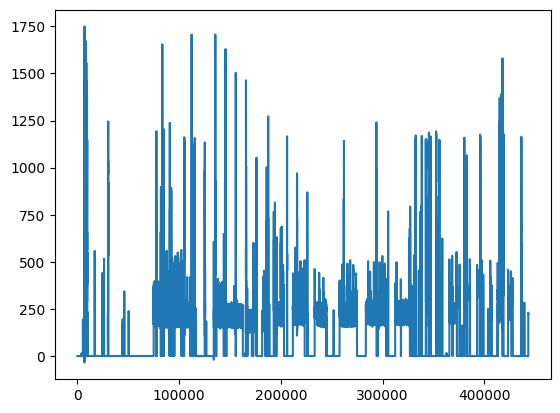

In [9]:
plt.plot(engine1["aIEngineLoad"])

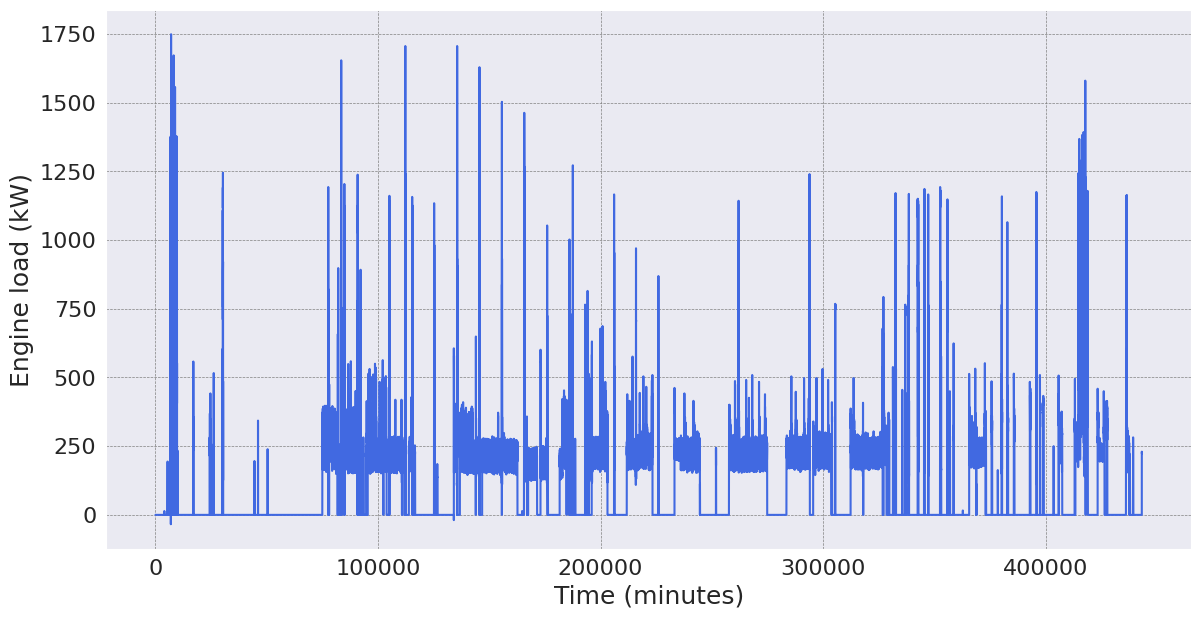

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(engine1["aIEngineLoad"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Engine load (kW)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


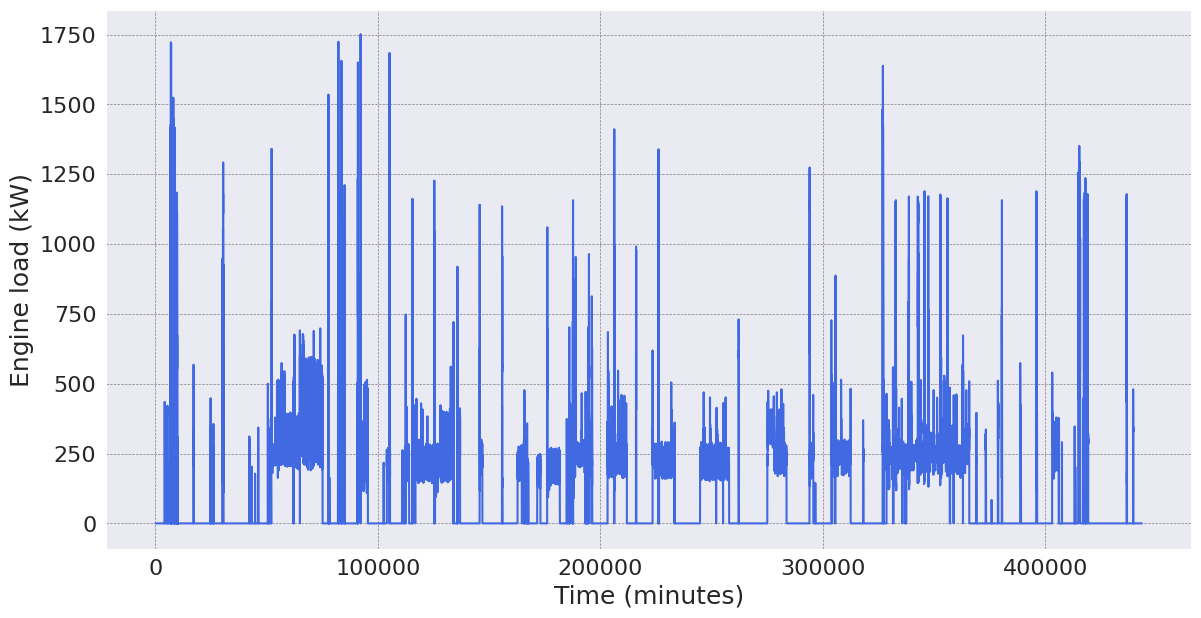

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(engine2["aIEngineLoad"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Engine load (kW)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


In [7]:
merged_df = pd.merge(engine1[["aIEngineLoad", "time", "battery_only"]], engine2[["aIEngineLoad", "time"]], on='time', how='inner')
merged_df["total_load"] = merged_df["aIEngineLoad_x"] + merged_df["aIEngineLoad_y"]
merged_df.shape

(369304, 5)

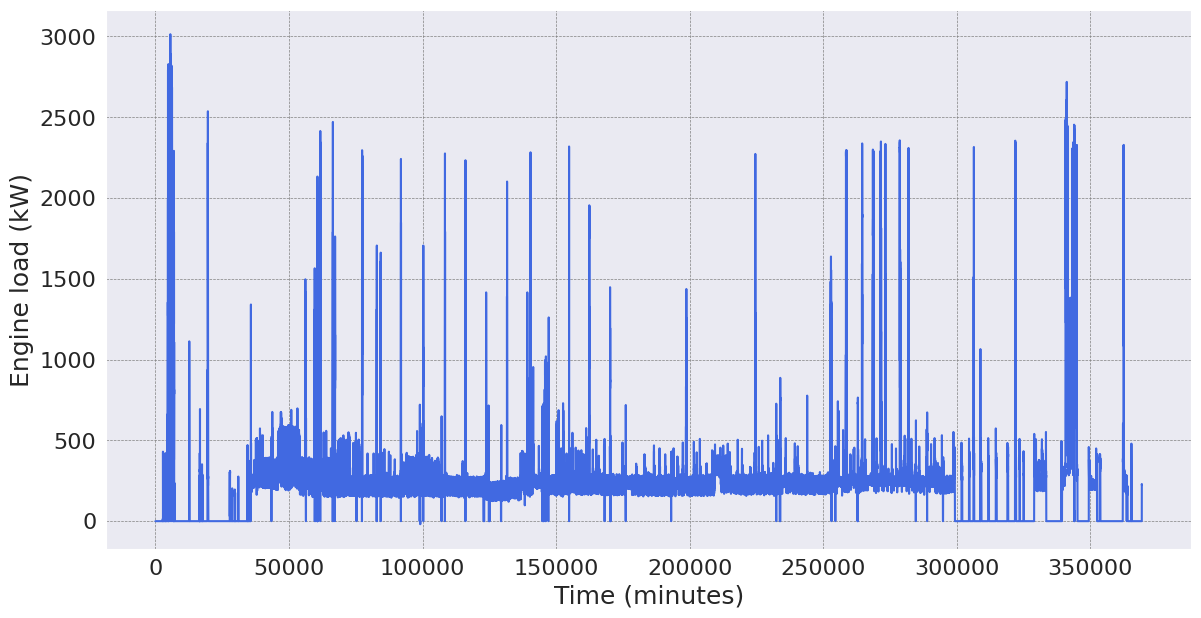

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(merged_df["total_load"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Engine load (kW)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


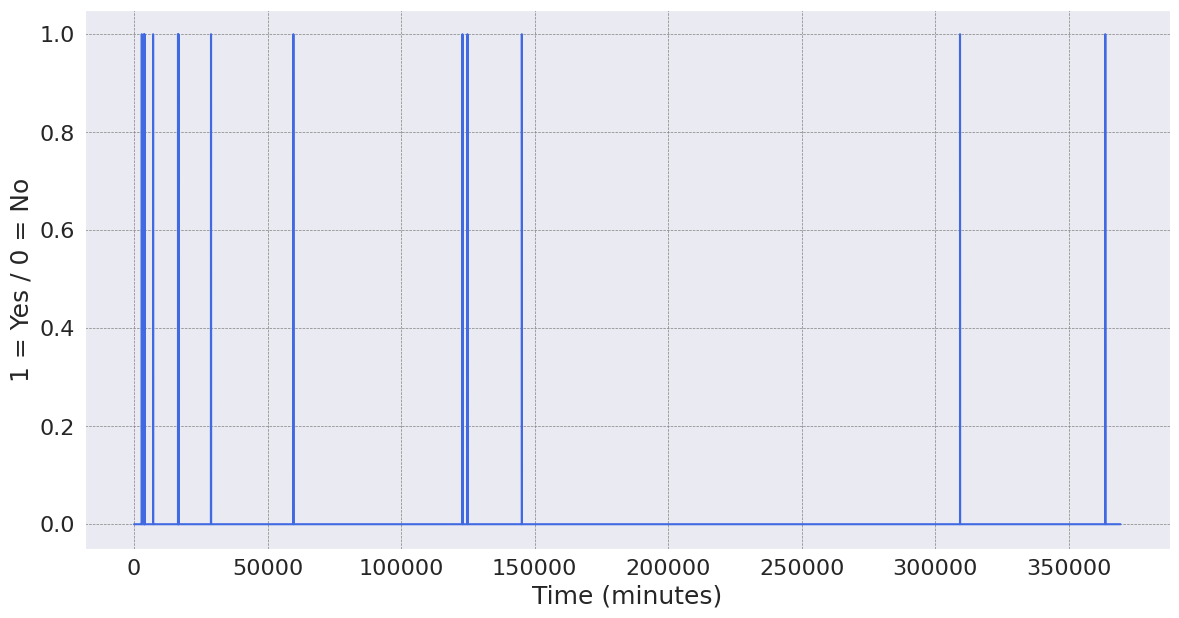

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 7))
sns.lineplot(merged_df["battery_only"], color="royalblue")

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('1 = Yes / 0 = No', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(color='gray', linestyle='--', linewidth=0.5)


In [15]:
# merged_df[merged_df["battery_only"]==1]["battery_only"].plot()
merged_df[merged_df["battery_only"]==1][merged_df[merged_df["battery_only"]==1]["total_load"]==0]

,aIEngineLoad_x,time,battery_only,aIEngineLoad_y,total_load
2840,0.0,2022-10-24T05:22:00.002000Z,1,0.0,0.0
2841,0.0,2022-10-24T05:23:00.002000Z,1,0.0,0.0
2842,0.0,2022-10-24T05:24:00.001000Z,1,0.0,0.0
2843,0.0,2022-10-24T05:25:00.002000Z,1,0.0,0.0
2844,0.0,2022-10-24T05:26:00.003000Z,1,0.0,0.0
...,...,...,...,...,...
145176,0.0,2023-03-07T11:55:55.001000Z,1,0.0,0.0
145177,0.0,2023-03-07T11:56:55Z,1,0.0,0.0
309227,0.0,2023-07-17T06:00:00Z,1,0.0,0.0
363621,0.0,2023-08-24T00:37:00Z,1,0.0,0.0


In [16]:
merged_df.describe()

,aIEngineLoad_x,battery_only,aIEngineLoad_y,total_load
count,369291.000000,369304.000000,369302.000000,369291.000000
mean,108.498236,0.000498,106.533311,215.030851
std,160.590200,0.022316,160.485158,225.119601
min,-34.000000,0.000000,-1.000000,-19.000000
25%,0.000000,0.000000,0.000000,180.000000
50%,0.000000,0.000000,0.000000,225.000000
75%,223.000000,0.000000,228.000000,248.000000
max,1706.000000,1.000000,1751.000000,3014.000000


# Analyze fuel and engine data combined

In [8]:
mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")
mgo["total_vol"] = mgo["MGO_STOR_TK_C_CALC_VOL"] + mgo["MGO_STOR_TK_S_CALC_VOL"] + mgo["NO1_MGO_SERV_TK_CALC_VOL"] + mgo["NO2_MGO_SERV_TK_CALC_VOL"]

/tmp/ipykernel_82962/3850218066.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

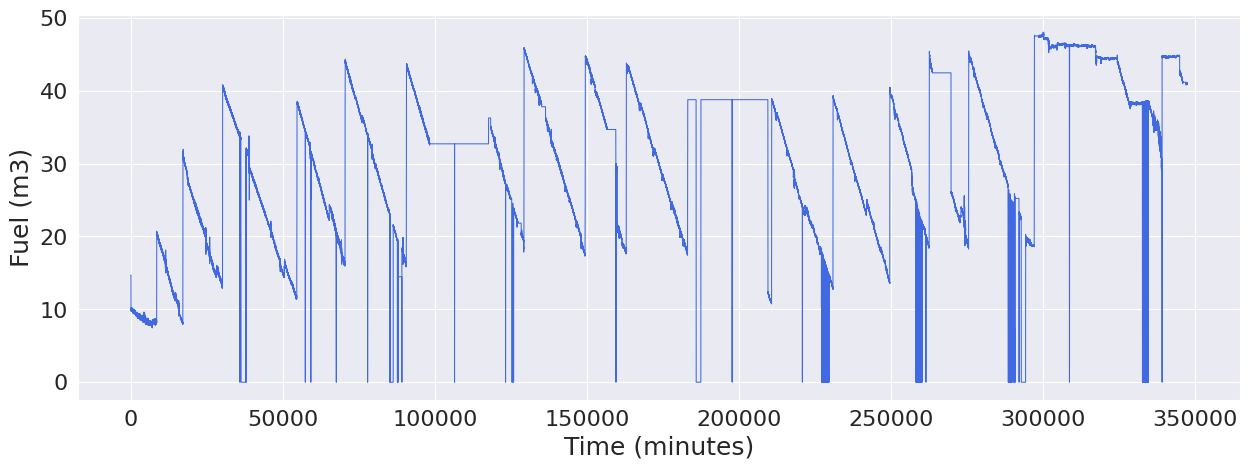

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
mgo["total_vol"].plot(color='royalblue', linewidth='0.75')

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=18)
plt.ylabel('Fuel (m3)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [9]:
engine_and_fuel_df = pd.merge(merged_df, mgo[["total_vol", "time"]], on='time', how='inner')
engine_and_fuel_df.shape

(107225, 6)

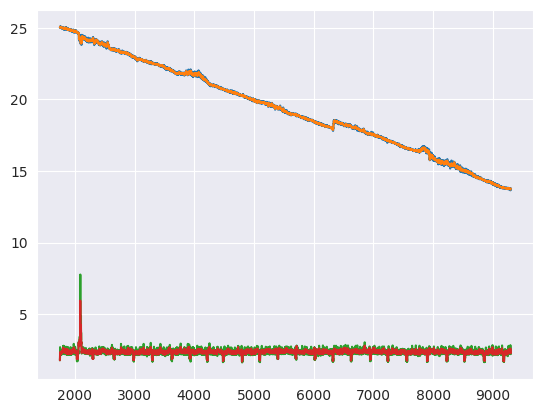

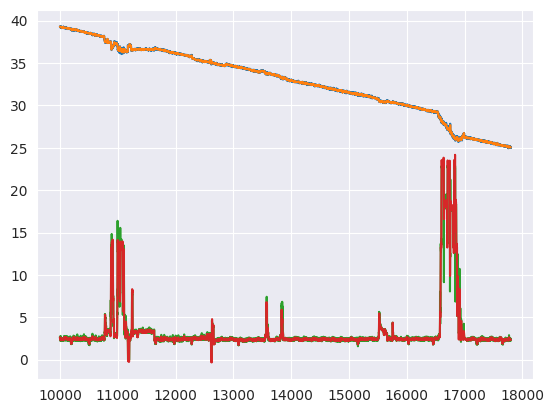

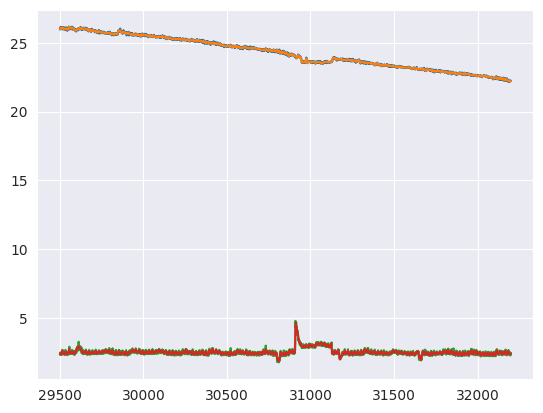

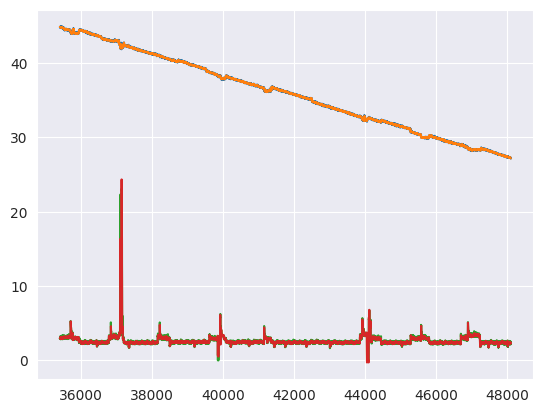

In [275]:
fuel_noise_start_points = [1750, 10000, 29500, 35400]
fuel_noise_end_points = [9300, 17800, 32200, 48100]

for noise_start_point, noise_end_point in zip(fuel_noise_start_points, fuel_noise_end_points):
    plt.figure()
    engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point].plot()
    plt.plot(
        engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point].index,
        savgol_filter(engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point], 10, 2))

    (engine_and_fuel_df["total_load"][noise_start_point:noise_end_point]/100).plot()
    plt.plot(
        engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point].index,
        savgol_filter(engine_and_fuel_df["total_load"][noise_start_point:noise_end_point]/100, 10, 2))

In [305]:
fuel_noise_start_points = [1750, 10000, 29500, 35400]
fuel_noise_end_points = [9300, 17800, 32200, 48100]

fuel_noise_dataset = []

for noise_start_point, noise_end_point in zip(fuel_noise_start_points, fuel_noise_end_points):
    data = engine_and_fuel_df[noise_start_point:noise_end_point][["total_load", "total_vol"]]
    data["filtered_vol"] = savgol_filter(data["total_vol"], noise_end_point-noise_start_point, 2)
    data["filtered_load"] = savgol_filter(data["total_load"], 10, 2)

    fuel_noise_dataset.append(data)

fuel_noise_df = pd.concat(fuel_noise_dataset)
fuel_noise_df.reset_index(drop=True, inplace=True)

<Axes: >

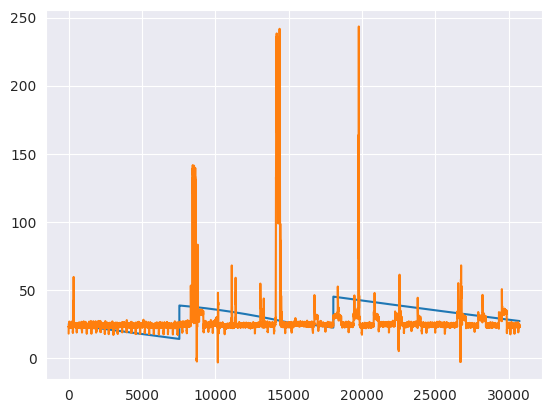

In [306]:
fuel_noise_df["filtered_vol"].plot()
(fuel_noise_df["filtered_load"]/10).plot()

In [294]:
fuel_noise_df

,total_load,total_vol
1750,178.0,25.000
1751,190.0,25.055
1752,198.0,25.050
1753,270.0,25.055
1754,237.0,25.085
...,...,...
48095,230.0,27.260
48096,237.0,27.230
48097,223.0,27.220
48098,225.0,27.220


## Analyze constant linear fuel consumption rate 

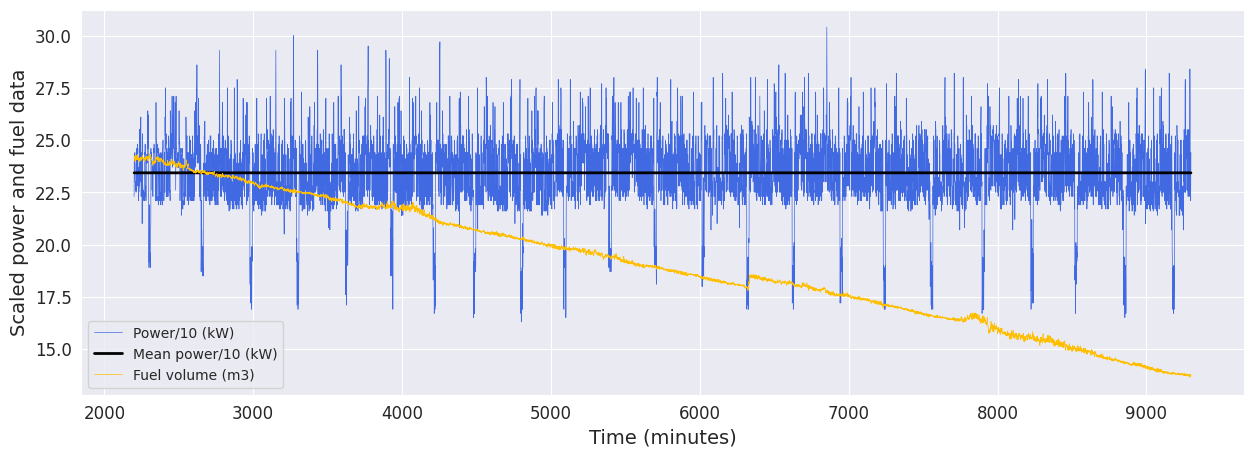

In [38]:
noise_start_point = 2200
noise_end_point = 9300
fuel_data = engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point]
load_data = engine_and_fuel_df["total_load"][noise_start_point:noise_end_point]

sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))


(load_data/10).plot(color='royalblue', linewidth=0.5)

plt.plot(load_data.index, np.ones(load_data.shape)*load_data.mean()/10, color='black', linewidth=2)

(fuel_data).plot(color='#FFBF00', linewidth=0.5)

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Scaled power and fuel data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Power/10 (kW)", "Mean power/10 (kW)", "Fuel volume (m3)"])

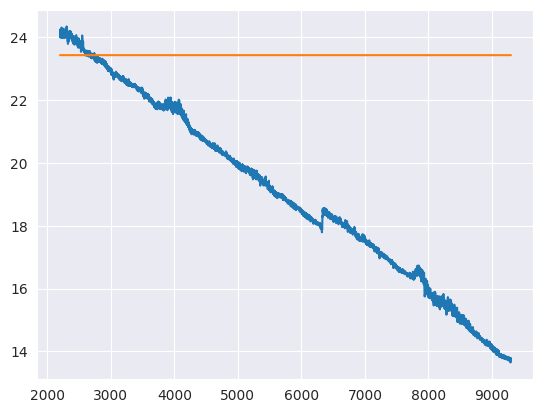

In [330]:
noise_start_point = 2200
noise_end_point = 9300
fuel_data = engine_and_fuel_df["total_vol"][noise_start_point:noise_end_point]
load_data = engine_and_fuel_df["total_load"][noise_start_point:noise_end_point]
(fuel_data).plot()
plt.plot(load_data.index, np.ones(load_data.shape)*load_data.mean()/10)

## Proofs

In [331]:
engine_and_fuel_df[noise_start_point:noise_end_point][["total_load", "total_vol"]]

,total_load,total_vol
2200,223.0,24.140
2201,241.0,24.085
2202,243.0,24.160
2203,241.0,24.230
2204,241.0,24.110
...,...,...
9295,243.0,13.690
9296,244.0,13.785
9297,221.0,13.775
9298,232.0,13.780


<Axes: >

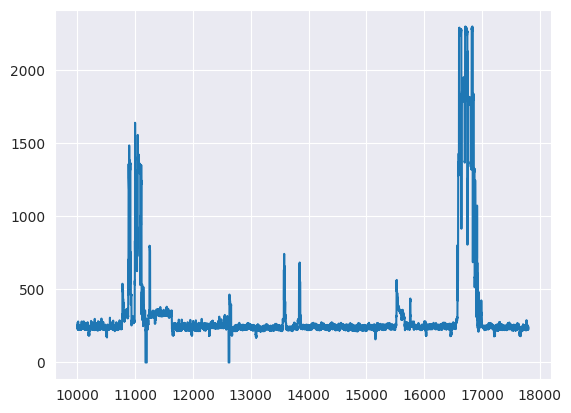

In [ ]:
noise_start_point = fuel_noise_start_points[1]
noise_end_point = fuel_noise_end_points[1]
engine_and_fuel_df["total_load"][noise_start_point:noise_end_point].plot()

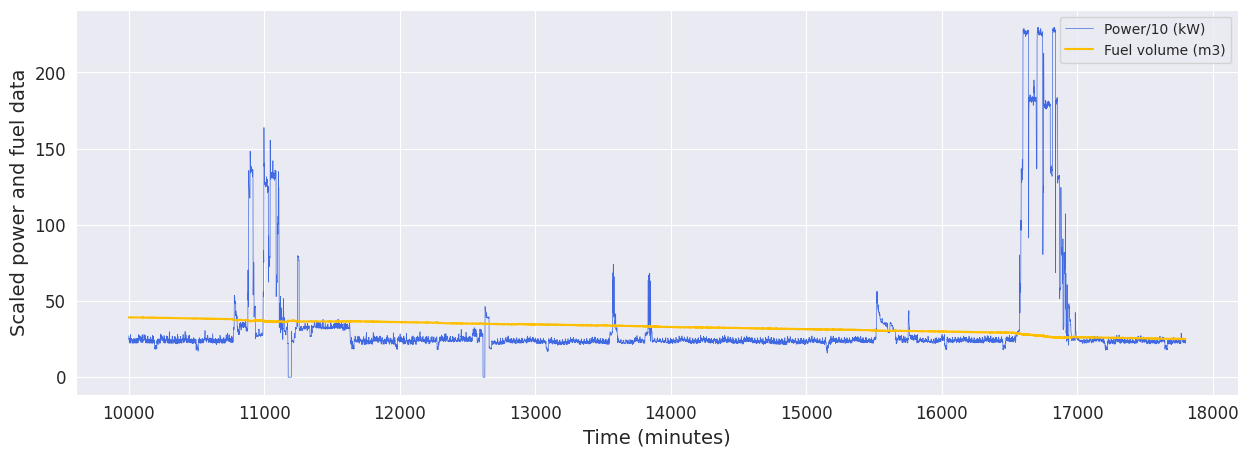

In [37]:
fuel_noise_start_points = [1750, 10000, 29500, 35400]
fuel_noise_end_points = [9300, 17800, 32200, 48100]

engine_noise_start_points = [1755, ]
engine_noise_end_points = [2000, ]
engine_noise_start_point = 10000
engine_noise_end_point = 17800
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
(engine_and_fuel_df["total_load"].loc[engine_noise_start_point:engine_noise_end_point]/10).plot(color='royalblue', linewidth=0.5)
engine_and_fuel_df["total_vol"].loc[engine_noise_start_point:engine_noise_end_point].plot(color='#FFBF00')

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Scaled power and fuel data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Power/10 (kW)", "Fuel volume (m3)"])

In [263]:
tmp = engine_and_fuel_df.loc[engine_noise_start_point:engine_noise_end_point]
tmp["scaled_load"] = tmp["total_load"] / 1000
tmp["diff_load"] = tmp["scaled_load"].diff()
tmp["diff_vol"] = tmp["total_vol"].diff()
tmp.set_index("time").corr()

/tmp/ipykernel_113746/1575319183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["scaled_load"] = tmp["total_load"] / 1000
/tmp/ipykernel_113746/1575319183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["diff_load"] = tmp["scaled_load"].diff()
/tmp/ipykernel_113746/1575319183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,aIEngineLoad_x,battery_only,aIEngineLoad_y,total_load,total_vol,scaled_load,diff_load,diff_vol
aIEngineLoad_x,1.000000,NaN,0.197245,0.745944,0.111274,0.745944,0.053708,-0.018474
battery_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aIEngineLoad_y,0.197245,NaN,1.000000,0.800058,-0.387217,0.800058,0.066590,-0.018775
total_load,0.745944,NaN,0.800058,1.000000,-0.194957,1.000000,0.078101,-0.024070
total_vol,0.111274,NaN,-0.387217,-0.194957,1.000000,-0.194957,0.003654,0.013498
scaled_load,0.745944,NaN,0.800058,1.000000,-0.194957,1.000000,0.078101,-0.024070
diff_load,0.053708,NaN,0.066590,0.078101,0.003654,0.078101,1.000000,0.005419
diff_vol,-0.018474,NaN,-0.018775,-0.024070,0.013498,-0.024070,0.005419,1.000000


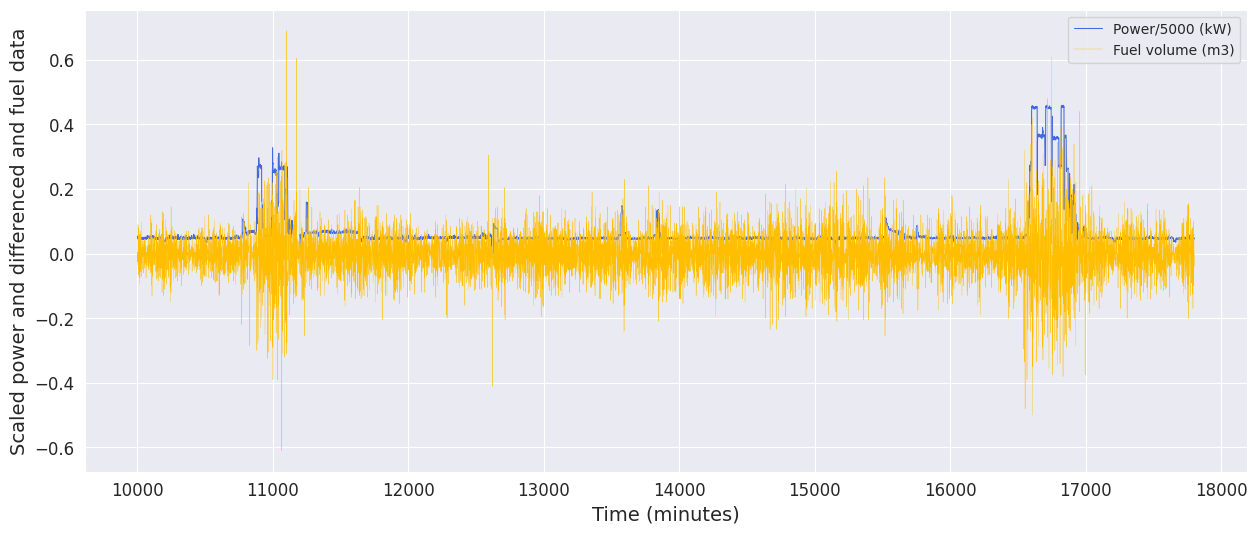

In [48]:
# Proof that the fuel consumption increases with the engine power

sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))

(engine_and_fuel_df["total_load"].loc[engine_noise_start_point:engine_noise_end_point]/5000).plot(color='royalblue', linewidth=0.75)
engine_and_fuel_df["total_vol"].loc[engine_noise_start_point:engine_noise_end_point].diff().plot(color='#FFBF00', linewidth=0.25)

# Customizing the plot
plt.xlabel('Time (minutes)', fontsize=14)
plt.ylabel('Scaled power and differenced and fuel data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Power/5000 (kW)", "Fuel volume (m3)"])

In [232]:
engine_and_fuel_df.describe()

,aIEngineLoad_x,battery_only,aIEngineLoad_y,total_load,total_vol
count,107222.000000,107225.000000,107225.000000,107222.000000,107225.000000
mean,94.161469,0.000028,110.509909,204.671942,34.632009
std,188.500050,0.005289,180.421204,296.343959,12.239203
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,25.220000
50%,0.000000,0.000000,0.000000,230.000000,38.335000
75%,223.000000,0.000000,239.000000,253.000000,44.560000
max,1580.000000,1.000000,1656.000000,2719.000000,48.025000


In [173]:
# Identify valid indices where fuel level is non-zero
tmp = engine_and_fuel_df.copy()
valid_indices = tmp[tmp["total_vol"] > 10].index
valid_fuel_levels = tmp.loc[valid_indices, "total_vol"]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels = f(valid_indices)

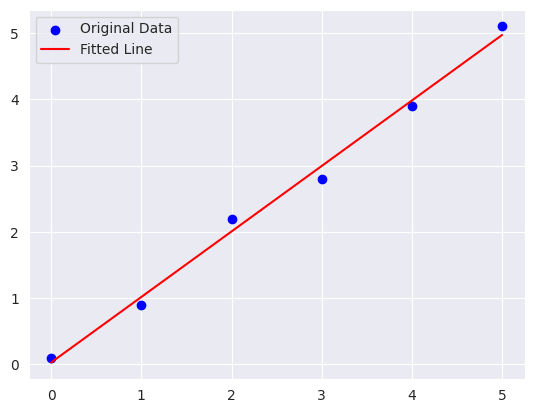

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example data with noise
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.1, 0.9, 2.2, 2.8, 3.9, 5.1])  # y = x + noise

# Reshape for sklearn
x_reshaped = x.reshape(-1, 1)

# Linear regression
model = LinearRegression()
model.fit(x_reshaped, y)

# Predict values
x_new = np.linspace(x.min(), x.max(), 100)
y_pred = model.predict(x_new.reshape(-1, 1))

# Plotting
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x_new, y_pred, color='red', label='Fitted Line')
plt.legend()
plt.show()


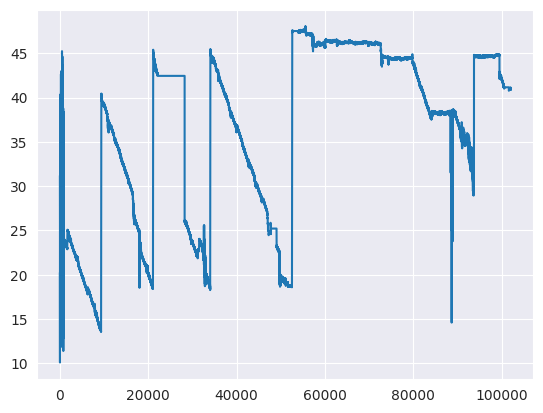

In [174]:
plt.plot(interpolated_fuel_levels)

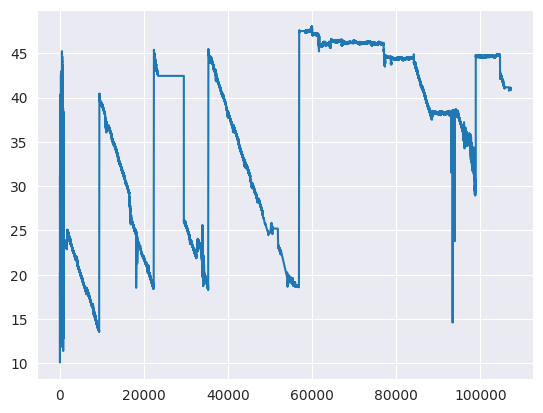

In [175]:
plt.plot(tmp.loc[valid_indices, "total_vol"])

<Axes: >

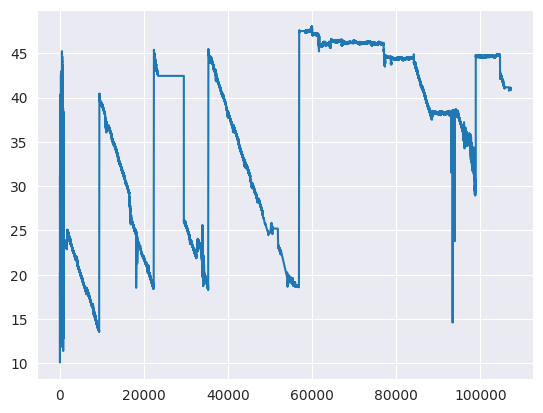

In [114]:
unnoisy_index = engine_and_fuel_df["total_vol"]>10
unnoisy_data = engine_and_fuel_df[unnoisy_index]
unnoisy_data["total_vol"].plot()

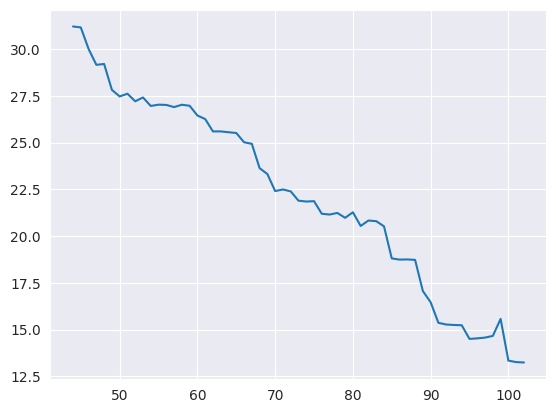

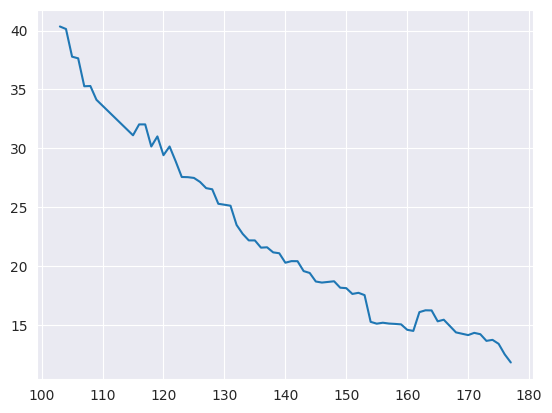

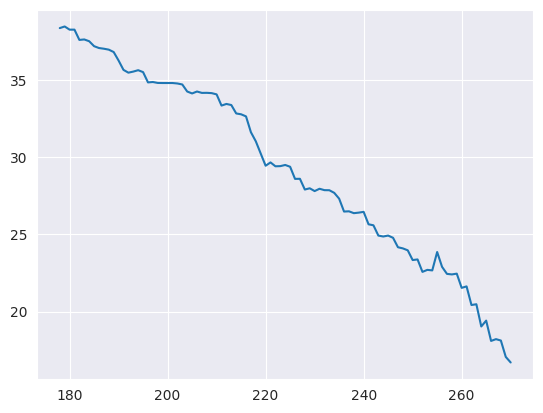

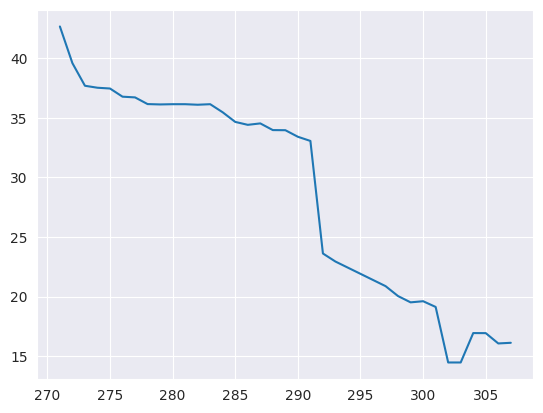

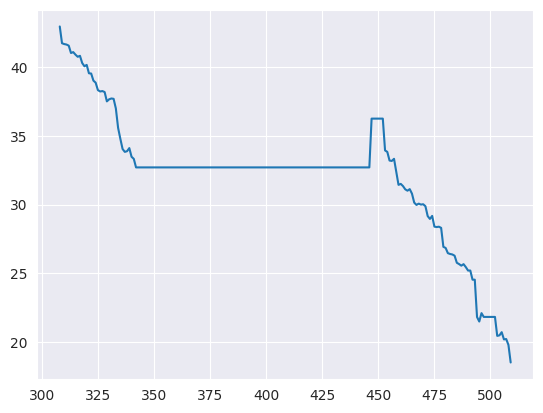

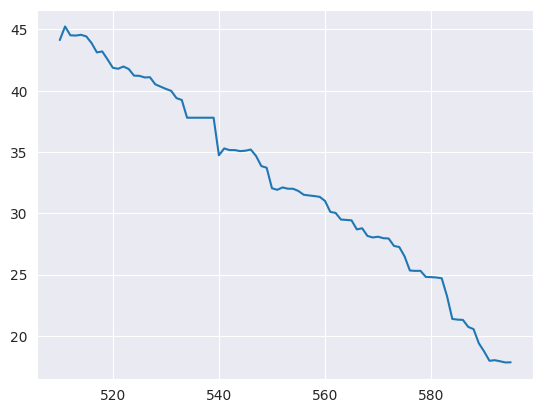

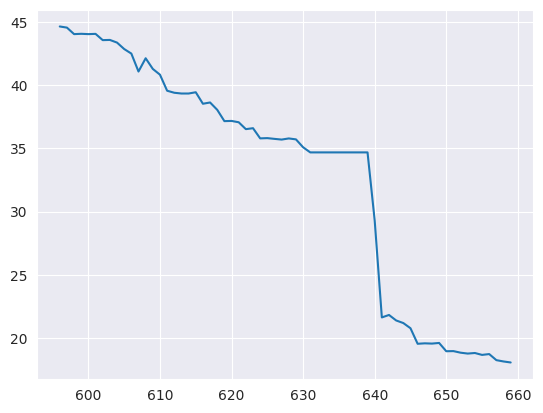

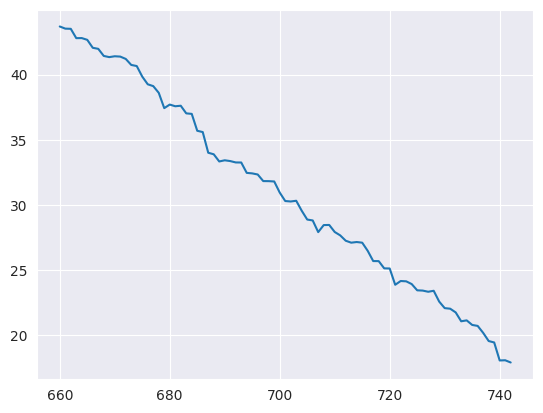

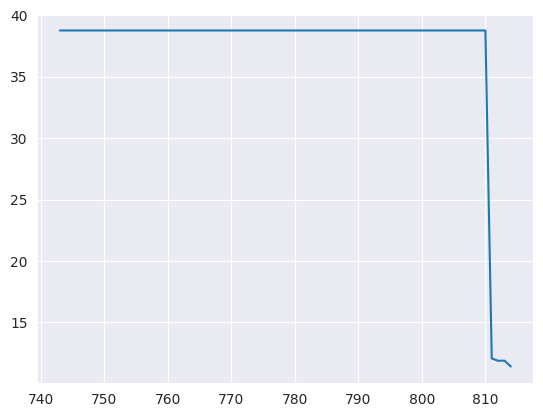

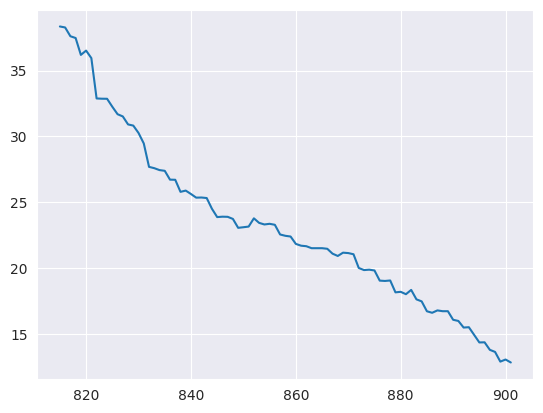

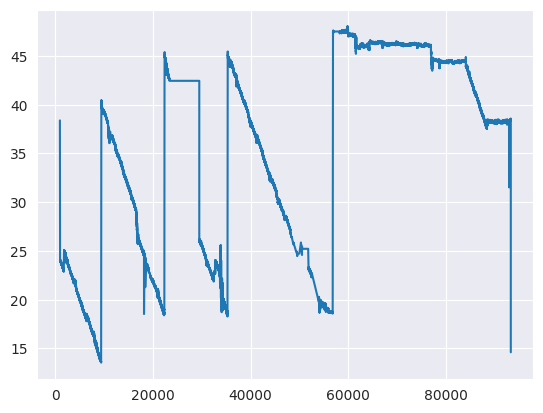

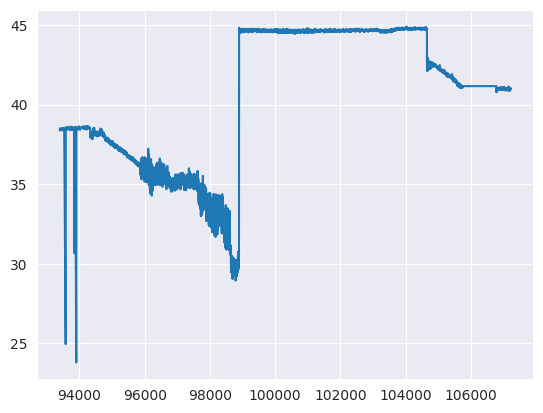

In [152]:
# Assume 'data' is your DataFrame and 'Fuel' is the column with fuel levels.
# Define the function to find segments after refueling
def find_segments_after_refueling(fuel_data, refuel_threshold):
    # Detect refueling points - where the fuel level jumps by 'refuel_threshold' or more
    refuel_points = np.where(np.diff(fuel_data) > refuel_threshold)[0] + 1
    
    # Initialize the list to store segments after refueling
    segments_after_refueling = []
    
    # Iterate through the refueling points and slice the data into segments after each refueling event
    for i, idx in enumerate(refuel_points):
        # The end of a segment is the next refueling point or the end of the dataset
        end_idx = refuel_points[i+1] if i+1 < len(refuel_points) else len(fuel_data)
        # Append the segment after refueling to the list
        segments_after_refueling.append(fuel_data[idx:end_idx])
    
    # Return the segments after refueling
    return segments_after_refueling

# Define the threshold for a refueling event
refuel_threshold = 15  # You can adjust this threshold as per your dataset

# Find the segments just after refueling
segments_after = find_segments_after_refueling(unnoisy_data['total_vol'], refuel_threshold)

# Example usage: print the first segment after refueling
for segment in segments_after:
    plt.figure()
    plt.plot(segment)

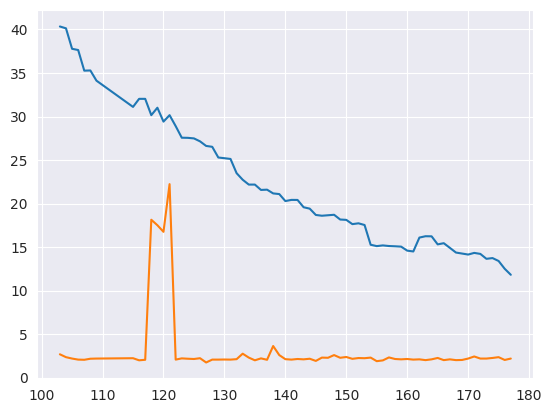

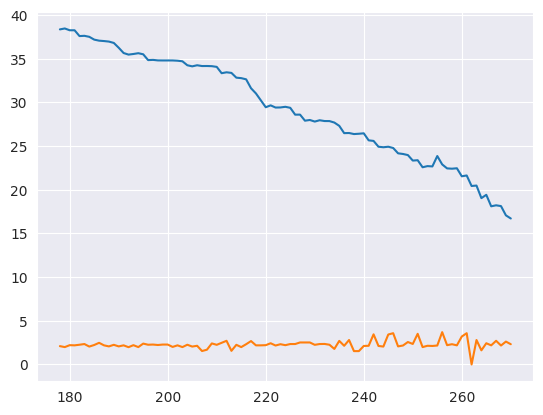

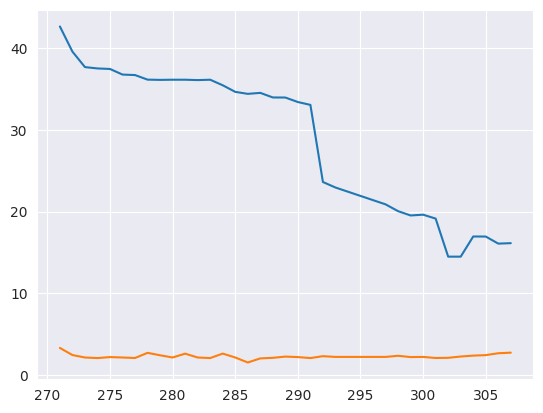

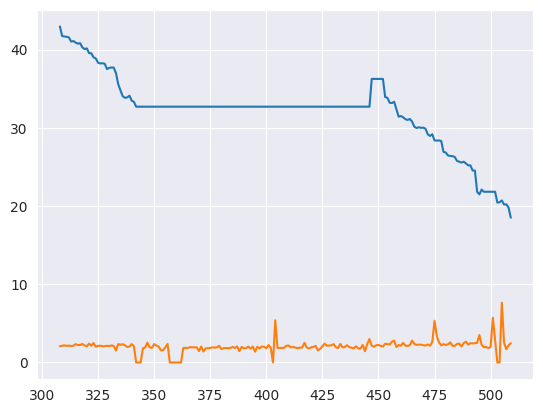

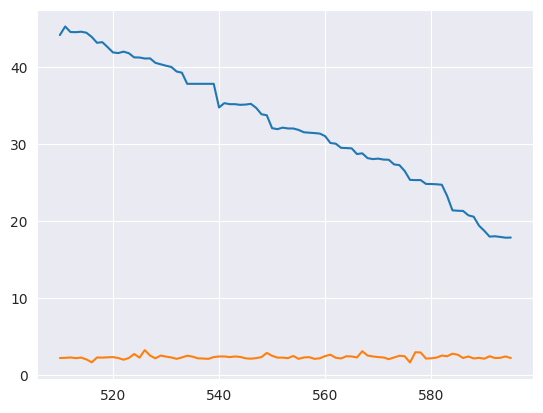

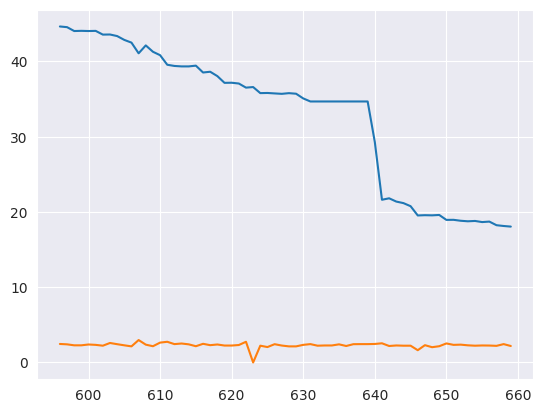

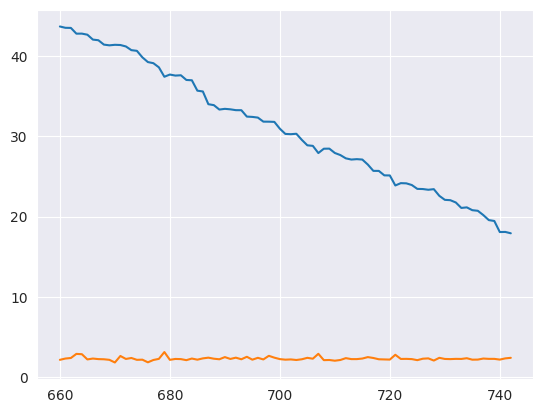

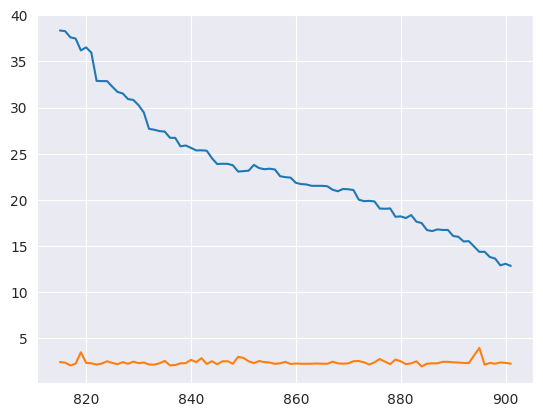

In [159]:
possible_segments = [1,2,3,4,5,6,7,9]

final_segments = []

for i in possible_segments:
    segment = segments_after[i]
    index = segment.index
    total_load = unnoisy_data.loc[index, "total_load"]/100
    plt.figure()
    plt.plot(segment)
    plt.plot(total_load)

<Axes: >

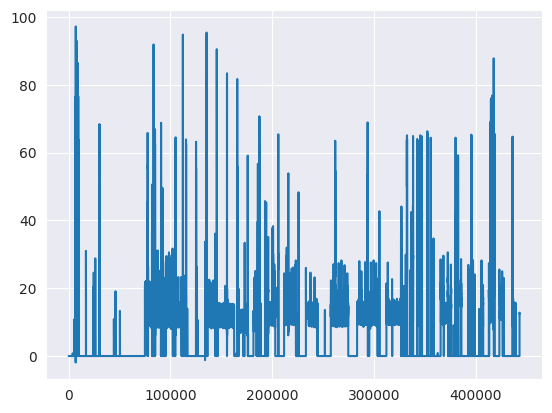

In [168]:
engine1["aIEngineLoadPercent"].plot()

In [156]:
index

Index([815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828,
       829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842,
       843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856,
       857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870,
       871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884,
       885, 886, 887, 888, 889, 890, 891, 892, 893, 895, 896, 897, 898, 899,
       900, 901],
      dtype='int64')

<Axes: >

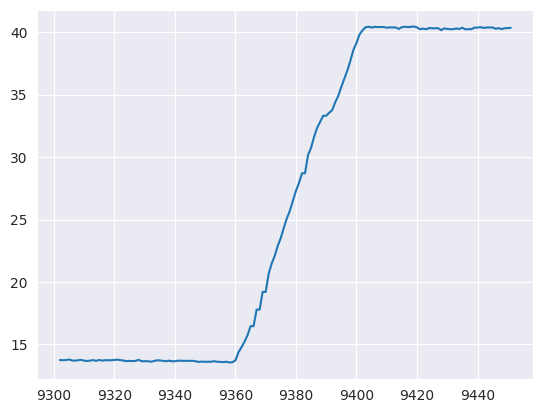

In [148]:
# Important segment that shows that refueling can be done much slower at a rate of 5

tmp_segment = segments_after[10]
tmp_segment[8400:8550].plot()
# segments_after_after = find_segments_after_refueling(segments_after[10], refuel_threshold)

# Fuel consumption analysis

In [17]:
mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")

/tmp/ipykernel_113746/2167716181.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mgo = pd.read_csv("RemoteLevelThing_HMD8310.csv")


<Axes: >

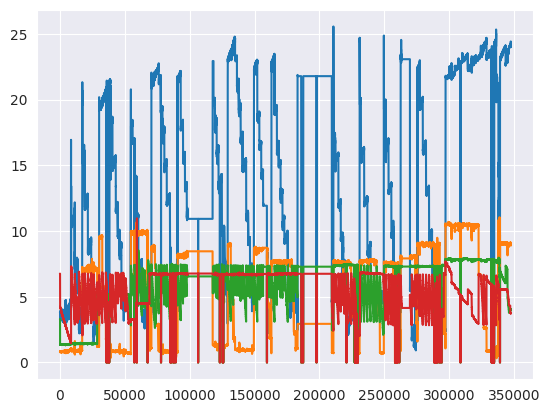

In [18]:
mgo["MGO_STOR_TK_C_CALC_VOL"].plot()
mgo["MGO_STOR_TK_S_CALC_VOL"].plot()
mgo["NO1_MGO_SERV_TK_CALC_VOL"].plot()
mgo["NO2_MGO_SERV_TK_CALC_VOL"].plot()

<Axes: >

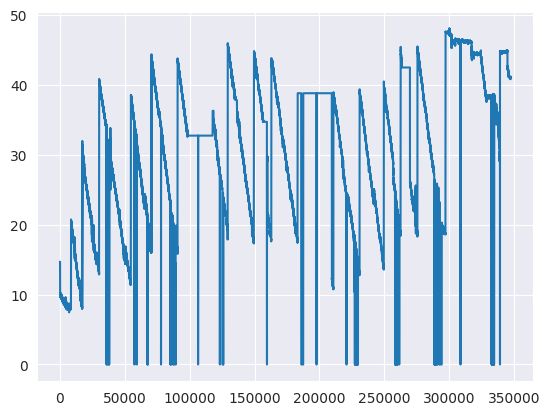

In [19]:
mgo["total_vol"] = mgo["MGO_STOR_TK_C_CALC_VOL"] + mgo["MGO_STOR_TK_S_CALC_VOL"] + mgo["NO1_MGO_SERV_TK_CALC_VOL"] + mgo["NO2_MGO_SERV_TK_CALC_VOL"]
mgo["total_vol"].plot()

<Axes: >

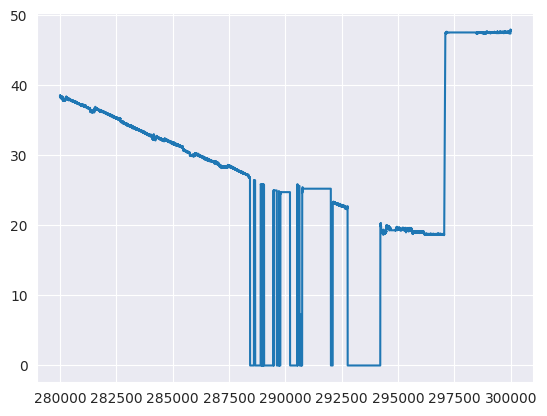

In [20]:
mgo["total_vol"][280000:300000].plot()

<Axes: >

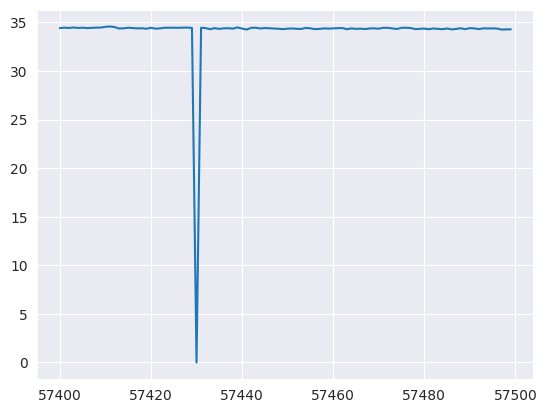

In [21]:
mgo["total_vol"][57400:57500].plot()

## Interpolation

In [22]:
# Identify valid indices where fuel level is non-zero
tmp = mgo.copy()
valid_indices = tmp[tmp["total_vol"] > 0].index
valid_fuel_levels = tmp.loc[valid_indices, "total_vol"]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels = f(valid_indices)

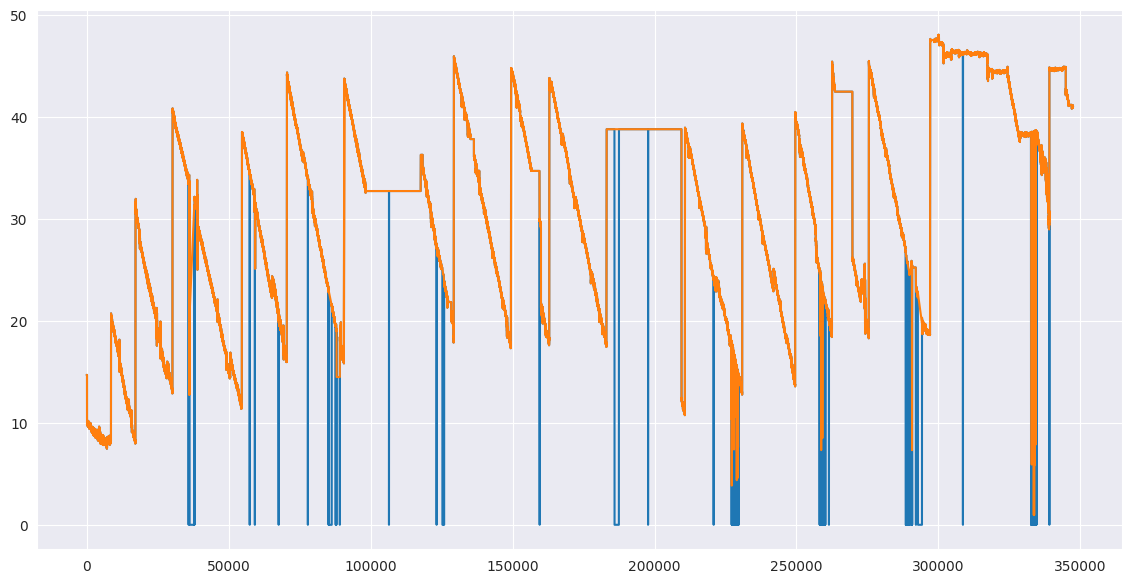

In [26]:
plt.figure(figsize=(14, 7))
mgo["total_vol"].plot()
plt.plot(valid_indices, interpolated_fuel_levels)

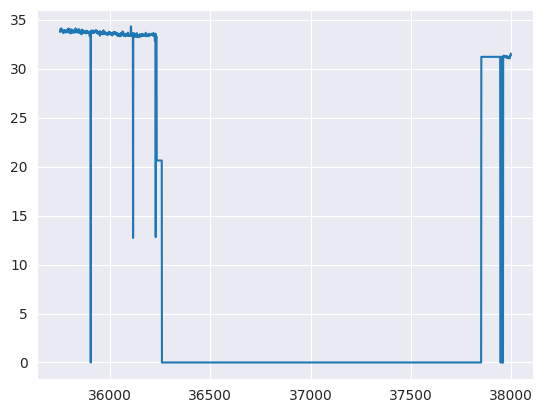

In [32]:
plt.figure()
noise1 = mgo["total_vol"][35750:38000].plot()

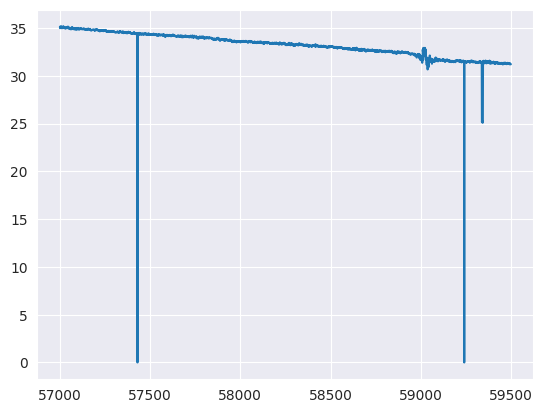

In [35]:
plt.figure()
noise2 = mgo["total_vol"][57000:59500].plot()

<Axes: >

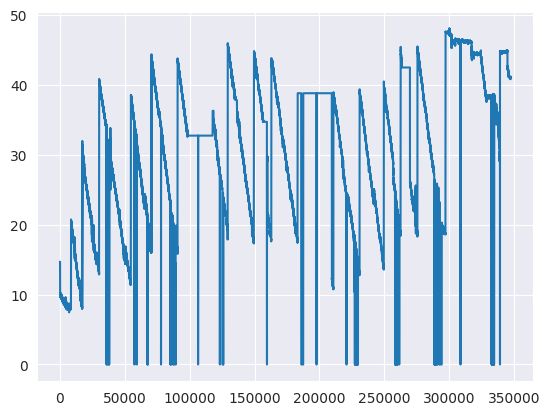

In [40]:
tmp["total_vol"].plot()

## Identify noisy segments

In [78]:
# Define a function to detect noise segments and correct them
def correct_noise_segments(volume_data, noise_value=7):
    corrected_data = np.copy(volume_data)
    is_noise = corrected_data < noise_value
    # Start and end indices of the noisy sequences
    noise_start_indices = np.where(np.diff(is_noise.astype(int)) == 1)[0] + 1
    noise_end_indices = np.where(np.diff(is_noise.astype(int)) == -1)[0] + 1

    # If the noise starts from the first data point, we assume the first non-noise value
    # as the start value for interpolation
    if is_noise[0]:
        noise_start_indices = np.insert(noise_start_indices, 0, 0)
        corrected_data[0] = corrected_data[noise_end_indices[0]]
    
    # Similarly, if the noise extends to the last data point, we use the last non-noise value
    if is_noise[-1]:
        noise_end_indices = np.append(noise_end_indices, len(is_noise) - 1)
        corrected_data[-1] = corrected_data[noise_start_indices[-1] - 1]

    # Perform interpolation for the sequences
    for start, end in zip(noise_start_indices, noise_end_indices):
        corrected_data[start:end] = np.interp(
            x=np.arange(start, end),
            xp=[start - 1, end],
            fp=[corrected_data[start - 1], corrected_data[end]]
        )

    return corrected_data

# Correct the noise in the volume data
unnoisy = correct_noise_segments(tmp['total_vol'].values)

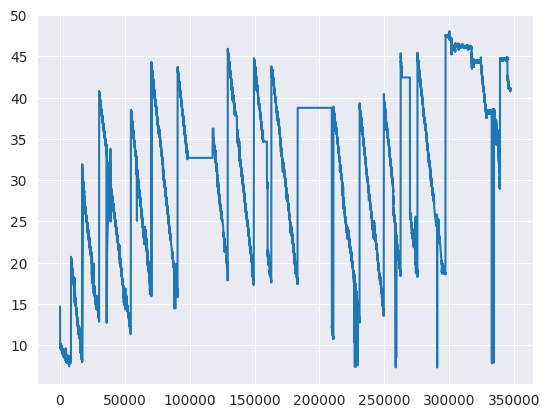

In [79]:
plt.plot(unnoisy)

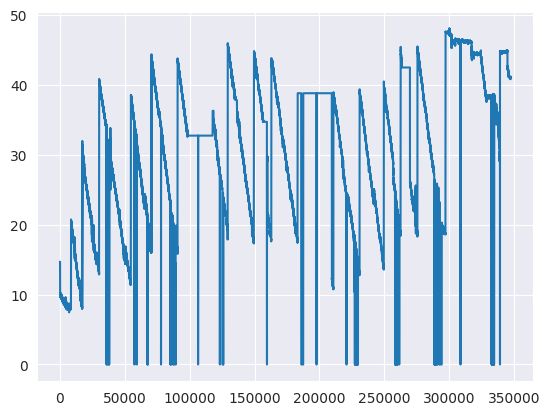

In [71]:
plt.plot(tmp["total_vol"])

<Axes: >

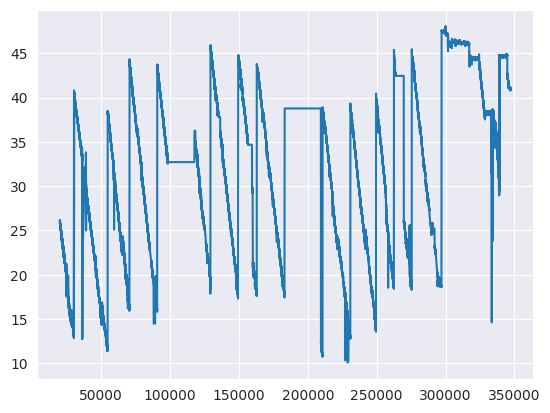

In [93]:
tmp = mgo["total_vol"][20000:].copy()
tmp[tmp>10].plot()

In [86]:
# Define a function to detect the start and end of refueling segments and correct noise
def detect_and_correct_noise(data, drop_threshold, refuel_threshold):
    # Convert the series to a numpy array for efficiency
    fuel_levels = data.values.flatten()
    
    # Identify refueling points where there is a sharp increase
    refuel_points = np.where(np.diff(fuel_levels) > refuel_threshold)[0] + 1
    
    # Initialize the start of the first segment
    segments = [(0, refuel_points[0] if refuel_points.size > 0 else len(fuel_levels))]

    # Identify all segments based on refueling points
    for i in range(len(refuel_points)):
        start = refuel_points[i]
        end = refuel_points[i + 1] if i + 1 < len(refuel_points) else len(fuel_levels)
        segments.append((start, end))

    return segments

    # # Correct noise within each segment
    # for start, end in segments:
    #     segment = fuel_levels[start:end]
    #     drops = np.where(np.diff(segment) < -drop_threshold)[0] + start + 1
    #     for drop in drops:
    #         if drop != start and drop != end - 1:  # Ignore drops at the segment boundaries
    #             # Set noisy points to NaN for later interpolation
    #             fuel_levels[drop] = np.nan
    
    # import pdb
    # pdb.set_trace()

    # # Interpolate to fill the NaN values
    # corrected_levels = pd.Series(fuel_levels).interpolate().values
    
    # return corrected_levels

# Define the threshold for noise and refueling
drop_threshold = 3  # Define the drop threshold for noise
refuel_threshold = 3  # Define the increase threshold for refueling

# Correct the noise in the fuel data using the defined thresholds
segments = detect_and_correct_noise(mgo['total_vol'], drop_threshold, refuel_threshold)

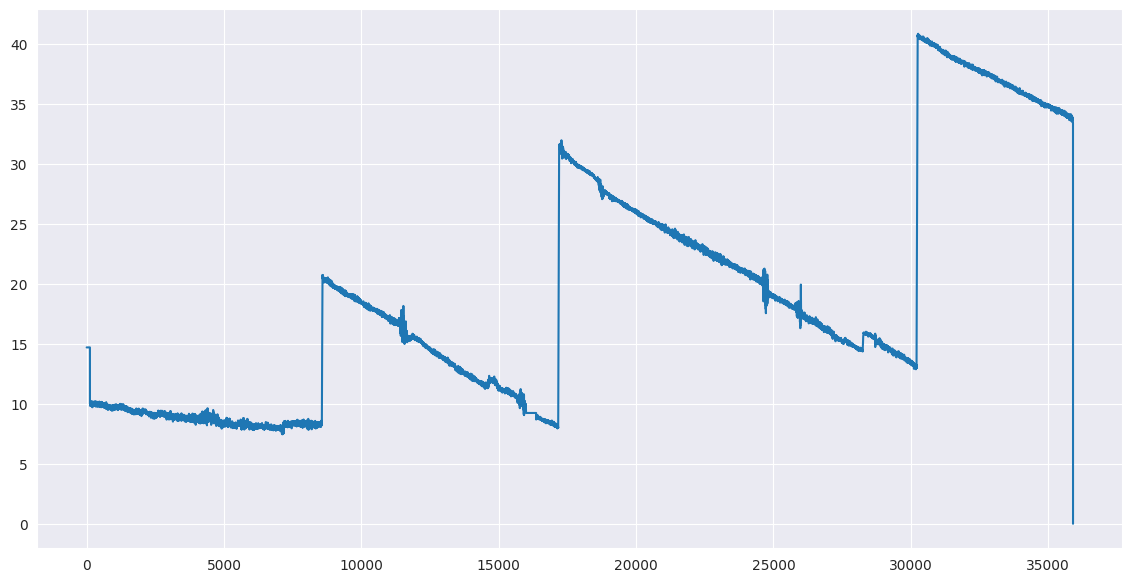

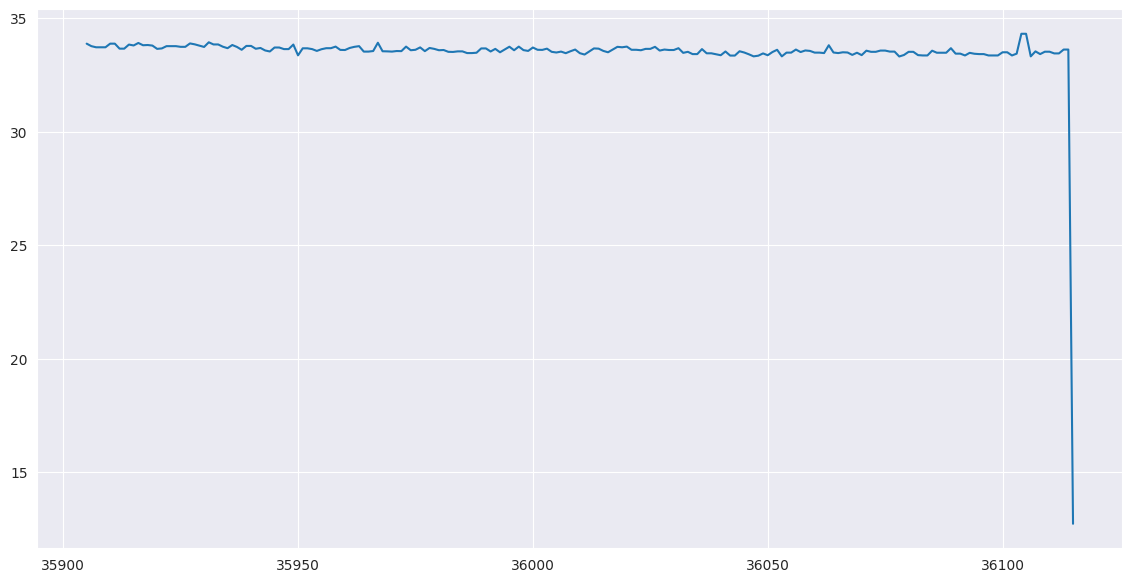

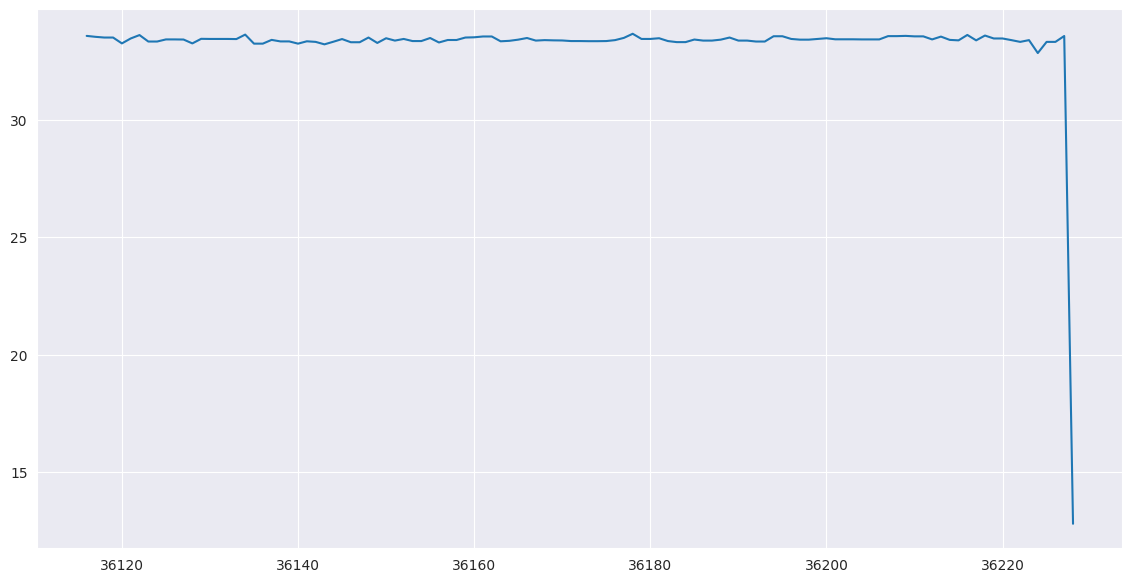

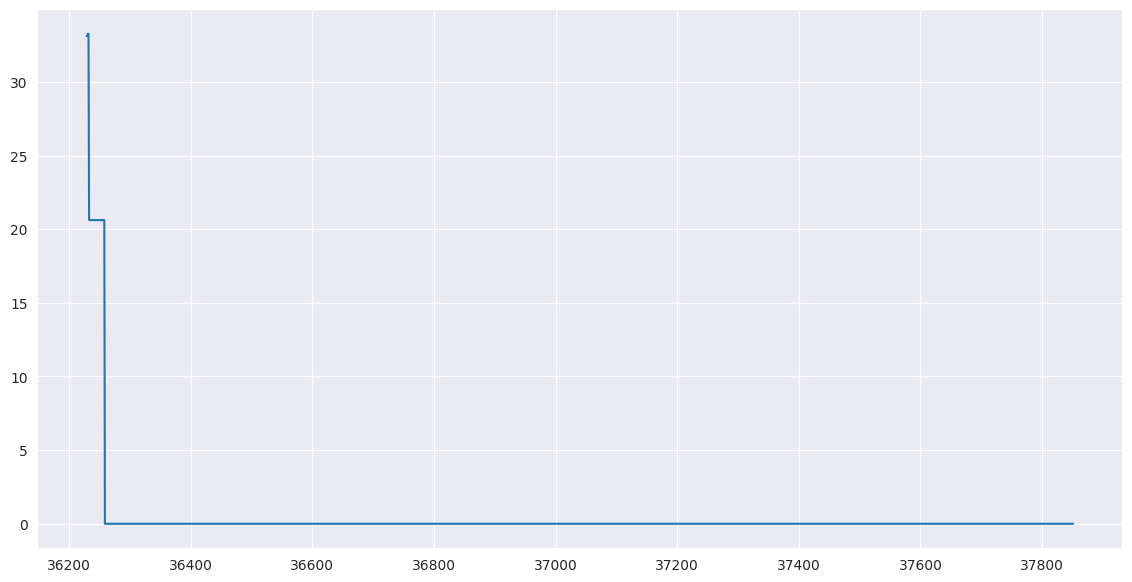

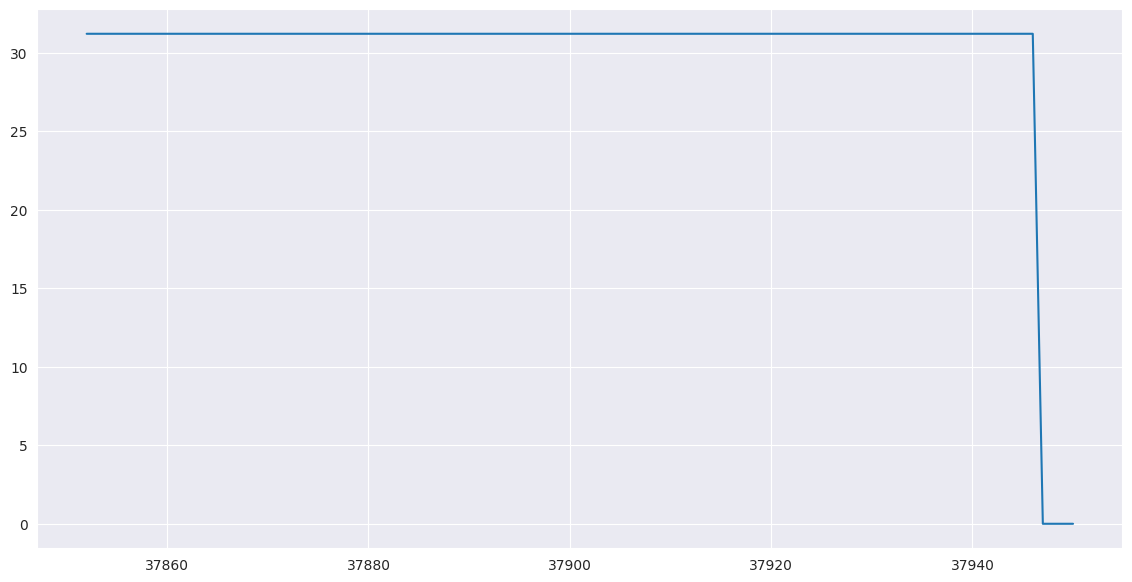

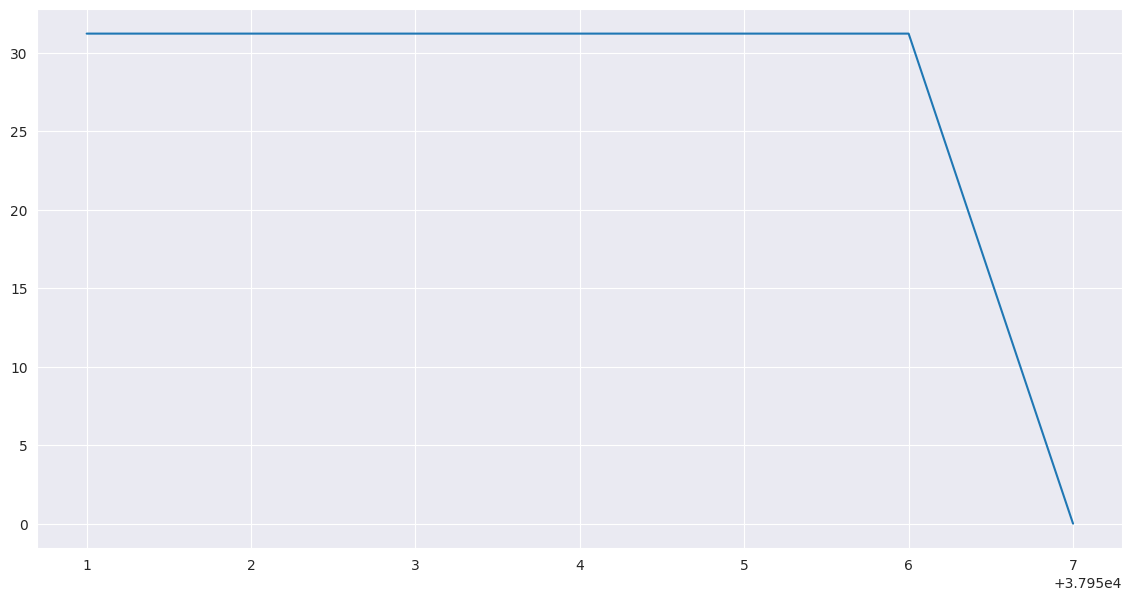

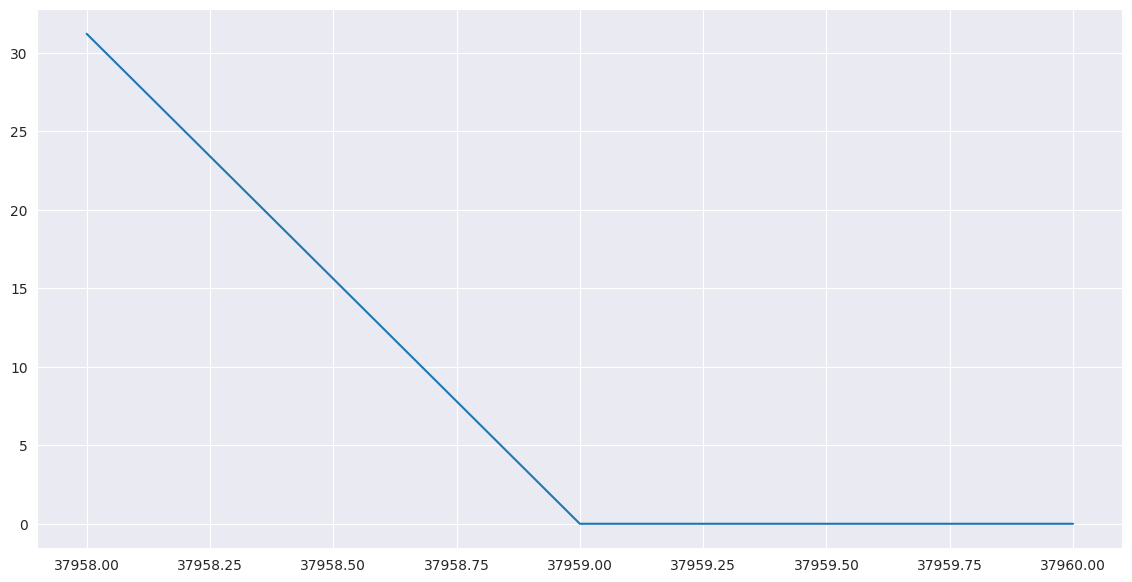

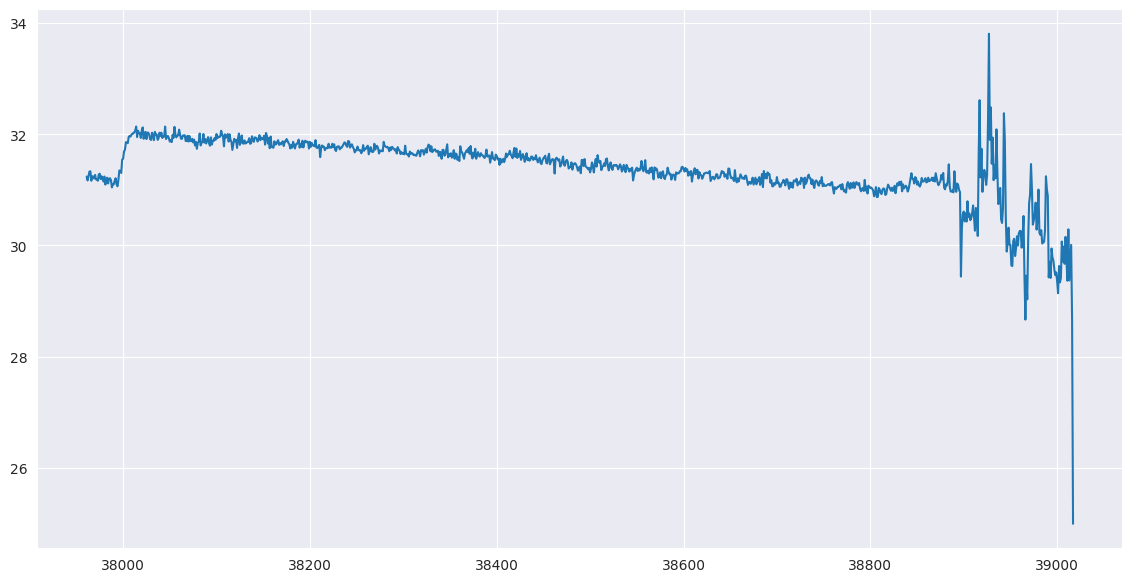

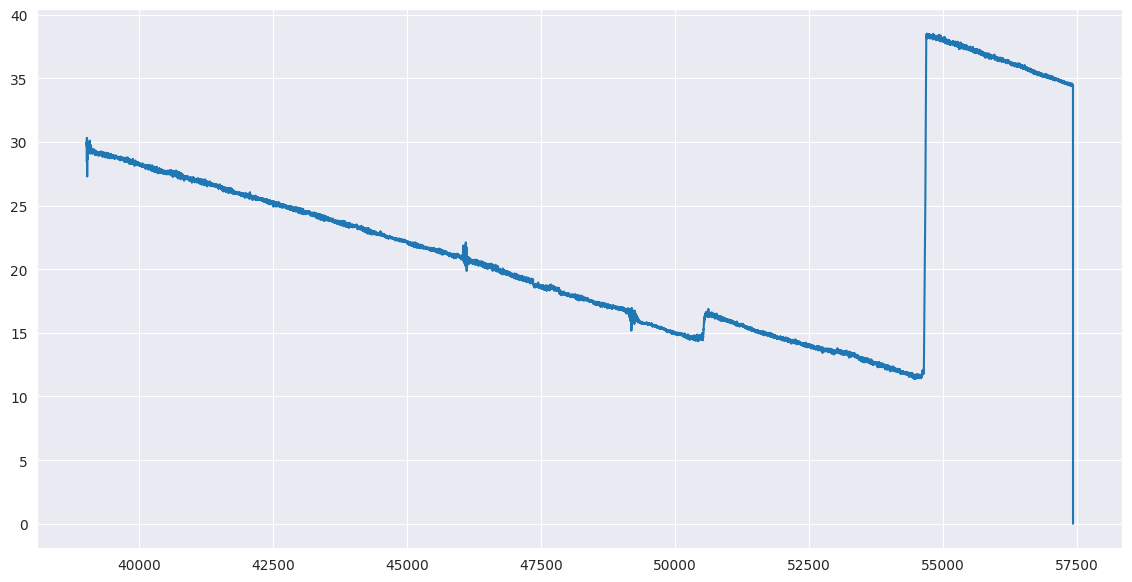

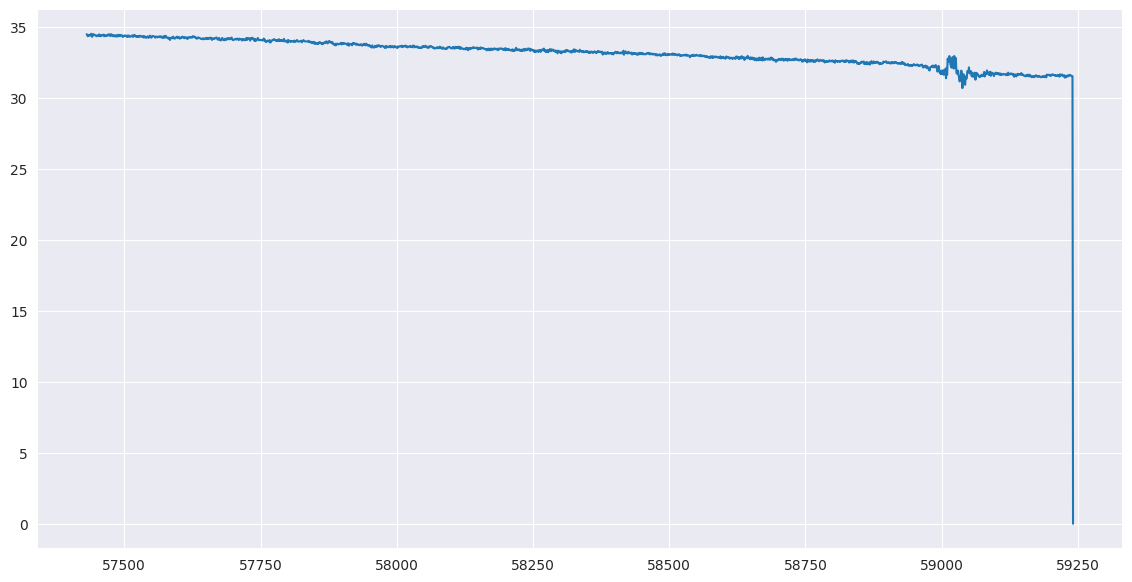

In [90]:
tmp = mgo["total_vol"].copy()

for start, end in segments[:10]:
    plt.figure(figsize=(14, 7))
    segment = tmp[start:end]
    segment.plot()

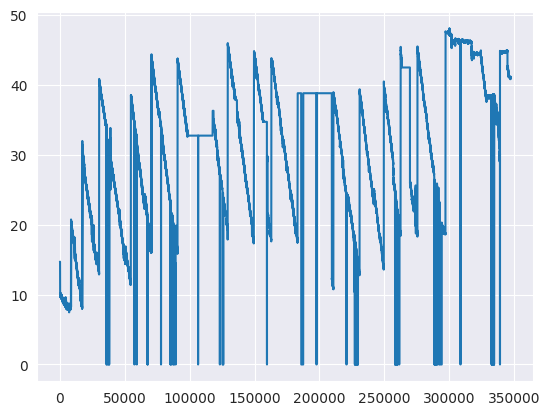

In [81]:
plt.plot(tmp)

# Finding the start and end point of the line containing the noise

In [76]:
tmp2 = mgo["total_vol"][30000:54720].copy()
valid_indices = tmp2[tmp2 > 0].index
valid_fuel_levels = tmp2.loc[valid_indices]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels2 = f(valid_indices)

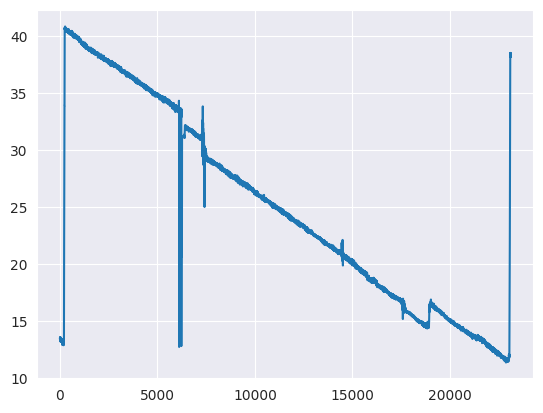

In [77]:
plt.plot(interpolated_fuel_levels2)

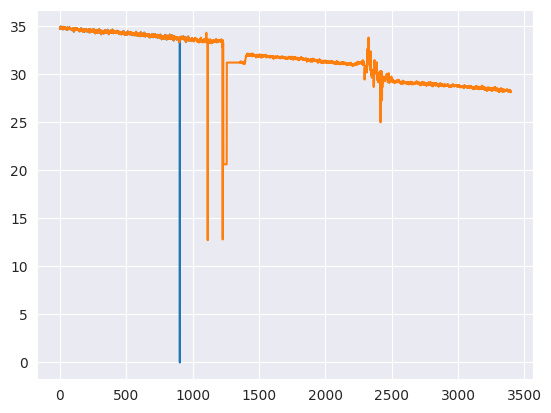

In [89]:
tmp2 = mgo["total_vol"][35000:40000].copy()
valid_indices = tmp2[tmp2 > 0].index
valid_fuel_levels = tmp2.loc[valid_indices]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels2 = f(valid_indices)

mgo["total_vol"][35000:36000].reset_index(drop=True).plot()
plt.plot(interpolated_fuel_levels2)

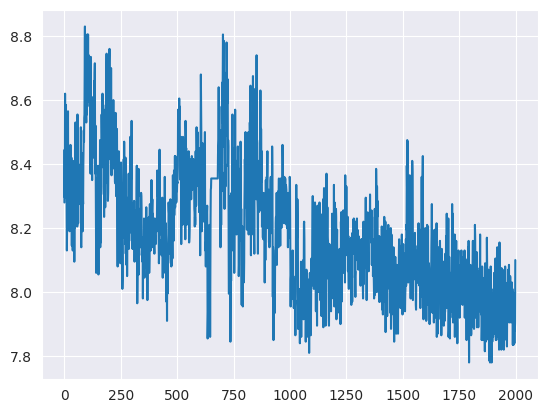

In [80]:
tmp3 = mgo["total_vol"][5000:7000].copy()
valid_indices = tmp3[tmp3 > 0].index
valid_fuel_levels = tmp3.loc[valid_indices]

# Create an interpolation function based on the valid data points
f = interp1d(valid_indices, valid_fuel_levels, kind='linear')

# Now interpolate for all time stamps
interpolated_fuel_levels3 = f(valid_indices)

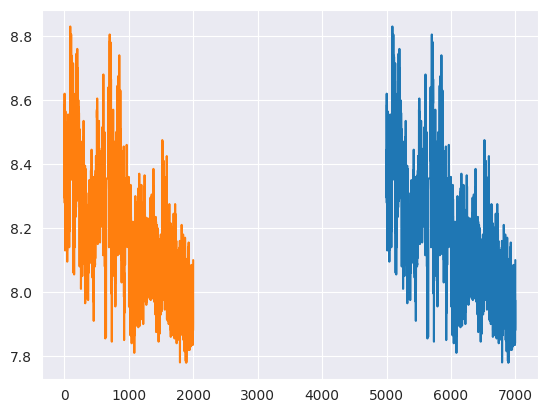

In [82]:
plt.plot(mgo["total_vol"][5000:7000])
plt.plot(interpolated_fuel_levels3)

<Axes: >

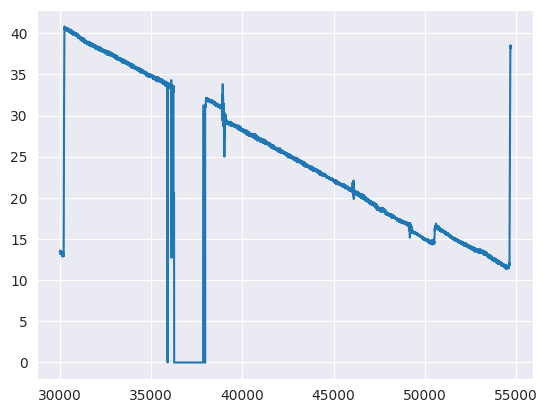

In [53]:
mgo["total_vol"][30000:54720].plot()

In [75]:
mgo["total_vol"][30000:54720].to_csv("noisy.csv", index=False)

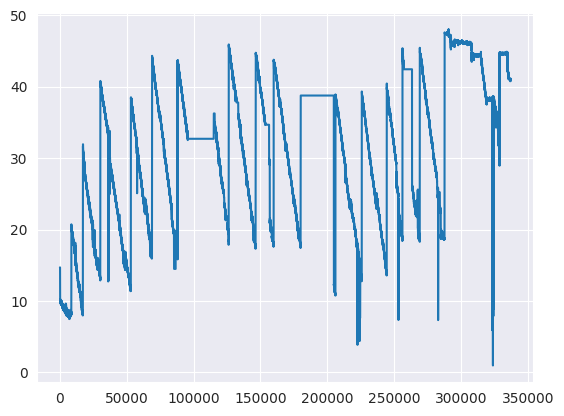

In [25]:
plt.plot(interpolated_fuel_levels)

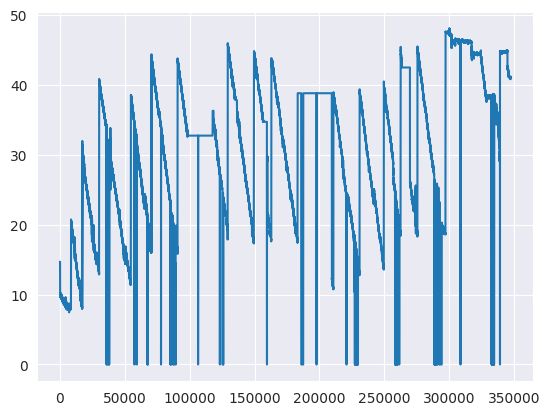

In [26]:
plt.plot(mgo["total_vol"])

In [21]:
valid_fuel_levels.shape

(337234, 23)

<Axes: >

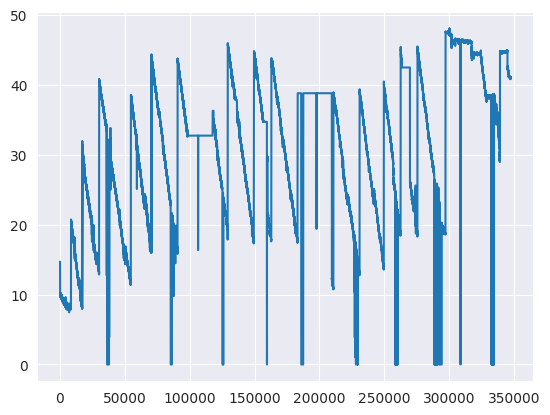

In [48]:
tmp["total_vol"].plot()

<Axes: >

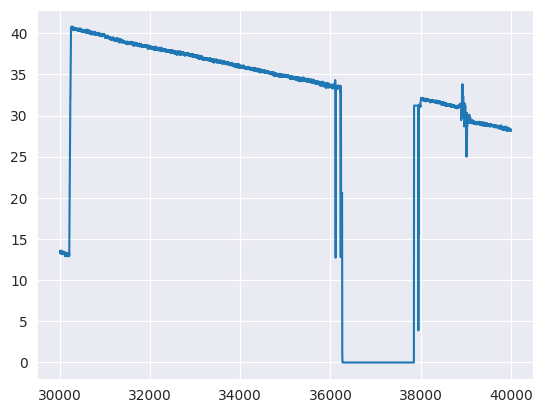

In [50]:
tmp["total_vol"][30000:40000].plot()

In [38]:
tmp

,Unnamed: 0,time,E_G_MGO_TK_LEVEL_L,MGO_STOR_TK_C_CALC_VOL,MGO_STOR_TK_C_LEVEL,MGO_STOR_TK_S_CALC_VOL,MGO_STOR_TK_S_LEVEL,NO1_MGO_SERV_TK_CALC_VOL,NO1_MGO_SERV_TK_LEVEL,NO1_WB_TK_C_CALC_VOL,...,NO2_WB_TK_P_CALC_VOL,NO2_WB_TK_P_LEVEL,NO2_WB_TK_S_CALC_VOL,NO2_WB_TK_S_LEVEL,NO3_WB_TK_P_CALC_VOL,NO3_WB_TK_P_LEVEL,NO3_WB_TK_S_CALC_VOL,NO3_WB_TK_S_LEVEL,valuestreamname,total_vol
0,0,2022-12-09T01:48:00Z,True,3.83,10.00000,0.8,10.00000,3.30,36.93730,1.75,...,35.09,163.47100,29.99,175.1360,15.41,74.12530,31.30,77.07270,ISS.Onshore.Model.VS,14.69
1,1,2022-12-09T01:49:00Z,True,3.83,10.00000,0.8,10.00000,3.30,36.87670,1.75,...,35.09,163.37450,29.99,175.1515,15.41,74.15825,31.30,77.21225,ISS.Onshore.Model.VS,14.69
2,2,2022-12-09T01:50:00Z,True,3.83,10.00000,0.8,10.00000,3.30,36.93070,1.75,...,35.09,163.38700,29.99,175.2325,15.41,74.04355,31.30,77.27895,ISS.Onshore.Model.VS,14.69
3,3,2022-12-09T01:51:00Z,True,3.83,10.00000,0.8,10.00000,3.30,36.99055,1.75,...,35.09,163.33350,29.99,175.3105,15.41,74.04665,31.30,77.29620,ISS.Onshore.Model.VS,14.69
4,4,2022-12-09T01:52:00Z,True,3.83,10.00000,0.8,10.00000,3.30,36.89720,1.75,...,35.09,163.37300,29.99,175.0995,15.41,74.11255,31.30,77.27735,ISS.Onshore.Model.VS,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347407,347407,2023-08-25T07:05:00Z,False,24.29,82.12010,9.0,65.23340,3.99,96.69730,4.08,...,4.56,36.39975,40.21,177.8600,15.57,78.74575,31.29,78.21905,ISS.Onshore.Model.VS,41.00
347408,347408,2023-08-25T07:06:00Z,False,24.29,81.96730,9.0,65.43560,3.99,96.85815,4.08,...,4.56,36.50995,40.21,178.0570,15.57,78.77640,31.29,78.52020,ISS.Onshore.Model.VS,41.00
347409,347409,2023-08-25T07:07:00Z,False,24.29,82.26920,9.0,65.33920,3.99,96.85855,4.08,...,4.56,36.54865,40.21,178.0185,15.57,78.97190,31.29,78.45320,ISS.Onshore.Model.VS,41.00
347410,347410,2023-08-25T07:08:00Z,False,24.29,82.58475,9.0,65.14410,3.99,96.83425,4.08,...,4.56,36.46245,40.21,177.8550,15.57,79.10345,31.29,78.33260,ISS.Onshore.Model.VS,41.00
